In [1]:
import tensorflow.keras as keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load training and test images (x), and their respective classified labels (y).
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)
First 10 training labels as digits:
 [5 0 4 1 9 2 1 3 1 4]



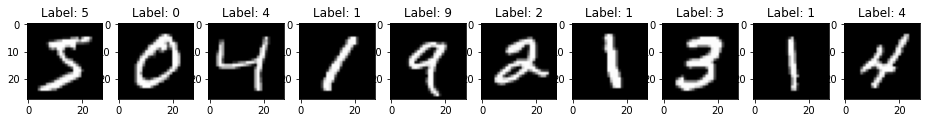

In [3]:
# Investigate the data

print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28
print("First 10 training labels as digits:\n", y_train[:10])
print("")

# Plot the first 10 images
plt.figure(figsize=[16,16])
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.title("Label: %i"%y_train[i])
    plt.imshow(x_train[i].reshape([28,28]),cmap='gray');

In [4]:
# Pre-processing of data

# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)
print("reshaped training data format: ", x_train.shape) # -- 60000 images, now flat arrays of 28*28 long

# one-hot encode the labels
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("First 10 training lables as one-hot encoded vectors:\n", y_train[:10])

reshaped training data format:  (60000, 784)
First 10 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [5]:
# Build the network
from keras.layers import Dense # Dense layers are "fully connected" layers
from keras.models import Sequential # Documentation: https://keras.io/models/sequential/

model = Sequential()

# The input layer requires the special input_shape parameter, which should equal the shape of our training data.
# The output layer must be the same size as the (one-hot encoded) labels.
# Choose a non-linear activation function such as a sigmoid, or relu.
# For classification purposes, where the outputs are normalized 'probabilities' between the classes,
#  one typically uses the softmax activation function for the last layer.

model.add(Dense(units=32, activation='sigmoid', input_shape=(image_vector_size,) ))
model.add(Dense(units=num_classes, activation='softmax'))

# Print model summary. Shows network layout, and # free parameters (weights + biases) to adapt while learning.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Compile the model

# A good loss function for probability classification that works well with softmax is the 'categorical crossentropy'.
#  It's a function of the difference between the predicted y (from running the image through the network),
#  and the actual label y that we get from the dataset. The larger the loss, the worst our network is performing.
# A good optimizer is the stochastic gradient descent (sgd) or adam.

model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

Test loss: 2.64
Test accuracy: 0.0985


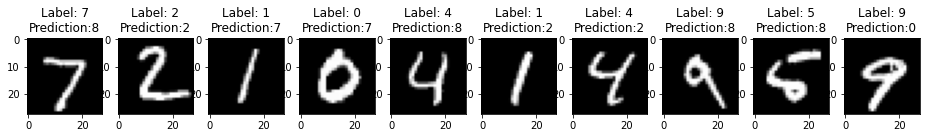

In [9]:
# Let's see how good the model 'predicts' some hand-written digits in our test dataset, without training.
# It's probably random: so for 10 digits, it should get an accuracy around 0.1 .

loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

y_pred_test = model.predict(x_test)

plt.figure(figsize=[16,16])
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.title("Label: {0}\nPrediction:{1}".format(
        np.argmax(y_test[i]), np.argmax(y_pred_test[i]) ))
    plt.imshow(x_test[i].reshape([28,28]),cmap='gray');

In [10]:
# Train the model.

# BATCH_SIZE defines how many images to process at once.
# EPOCHS defines how often to run over the total data (60000 images)
# (Note that a small part of the train data is internally split off for independent validation of the metrics)

BATCH_SIZE = 128
EPOCHS = 5

history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1, validation_split=.1)

Epoch 1/5
422/422 [==============================] - 2s 4ms/step - loss: 1.4266 - accuracy: 0.6427 - val_loss: 0.9823 - val_accuracy: 0.8302
Epoch 2/5
422/422 [==============================] - 1s 4ms/step - loss: 0.8665 - accuracy: 0.8329 - val_loss: 0.6872 - val_accuracy: 0.8763
Epoch 3/5
422/422 [==============================] - 1s 4ms/step - loss: 0.6784 - accuracy: 0.8611 - val_loss: 0.5705 - val_accuracy: 0.8898
Epoch 4/5
422/422 [==============================] - 1s 3ms/step - loss: 0.5765 - accuracy: 0.8770 - val_loss: 0.4807 - val_accuracy: 0.9055
Epoch 5/5
422/422 [==============================] - 1s 4ms/step - loss: 0.5136 - accuracy: 0.8836 - val_loss: 0.4312 - val_accuracy: 0.9072


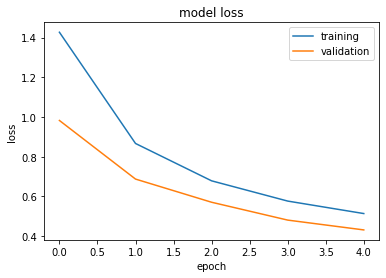

In [11]:
# Plot the progression of the training loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

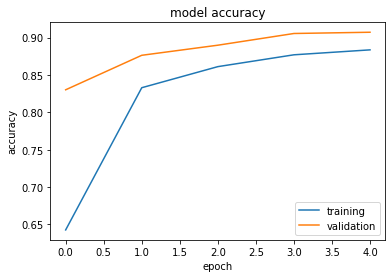

In [12]:
# Plot the progression of the training accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

Test loss: 0.48
Test accuracy: 0.894


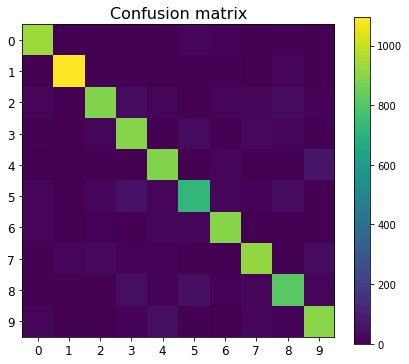

In [14]:
# Evaluate model on test data - how often does the network predict the right label after training?

loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

# Make a confusion matrix to see which numbers are difficult to disentangle

y_pred_test = model.predict(x_test) # obtain one-hot encoded predictions for the x_test images
y_test_index      = [ np.argmax(i) for i in y_test ] # actual number known labels
y_pred_test_index = [ np.argmax(i) for i in y_pred_test ] # actual number predictions
y_pred_test_proba = [ y_pred_test[i][ y_pred_test_index[i] ] for i in range(len(y_test_index)) ] # probabilities to be correct

from sklearn.metrics import confusion_matrix
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test_index, y_pred_test_index ))
plt.xticks(np.arange(10), np.arange(10), rotation=0, fontsize=12)
plt.yticks(np.arange(10), np.arange(10), fontsize=12)
plt.colorbar()
plt.show()

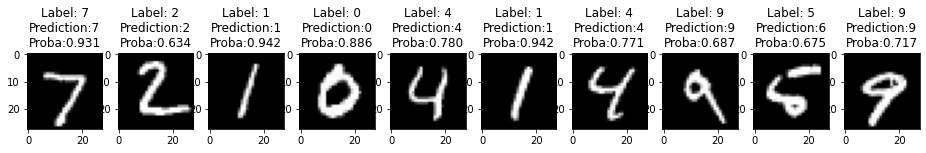

In [15]:
# Show some predicted labels and their probabilities to be correct
plt.figure(figsize=[16,16])
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.title("Label: {0}\nPrediction:{1}\nProba:{2:.3f}".format(
        y_test_index[i], y_pred_test_index[i], y_pred_test_proba[i] ))
    plt.imshow(x_test[i].reshape([28,28]),cmap='gray');